In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import TridiagonalMatrixHandler as tmh
from numba import njit

%matplotlib notebook

# $$\frac{\partial u}{\partial t}=D\frac{\partial^2 u}{\partial x^2} + au(1-\frac{u}{T(i)}) - σu;$$

$$F(u)=au^k_j\cdot(1-\frac{u^{k+1}_j}{T(i)})- \sigma u^{k+1}_j$$

In [2]:
tmh.showAllConstant()

@njit
def allSourceFraction(numerator, i, u1=0): 
    denominator = 6000/i*tmh.sourceKoeff
    return numerator/denominator

u, x = tmh.createAndSolveMatrix(allSourceFraction)
print("\nФункция по которой считаем доступные ресурсы T(i) = 6000/i * "+ str(tmh.sourceKoeff))
#print(u.max())

Коэффициент миграции (D) = 0.5	Рождения новых людей (a) = 2.0
Смертность населения (σ) = 1.0	Ёмкость среды K = 2.0
Количество точек по ОХ (N) = 10000	Количество точек по времени (KT) = 10000

Функция по которой считаем доступные ресурсы T(i) = 6000/i * 2.0


<IPython.core.display.Javascript object>


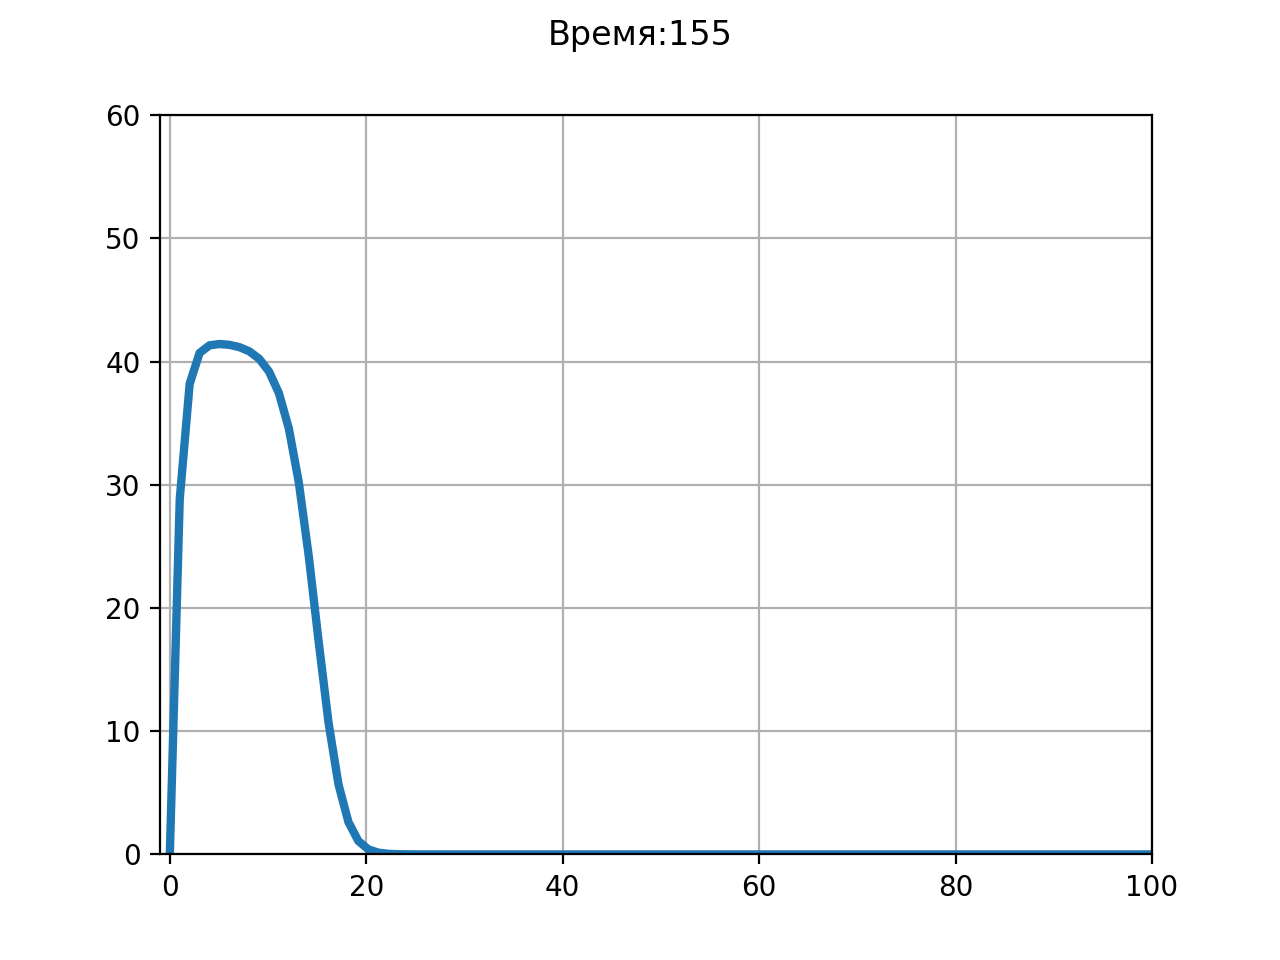

In [10]:
fig = plt.figure(facecolor='white')
ax = plt.axes(xlim=(-1, tmh.L), ylim=(0, 60) )
line, = ax.plot([ ], [ ], lw=3)
def redraw(i):
    line.set_data(x, u[:,i])
    string = 'Время:'+str(i)
    plt.suptitle(string)
anim = animation.FuncAnimation(fig,redraw,frames=tmh.KT,interval=100)
plt.grid(True)
plt.show()

In [11]:
diff = 0.5
value = 0
for i in range(1, tmh.N - 1):
    if abs(u[int(tmh.N/3), int(tmh.KT/3)] - u[i, int(tmh.KT/3) + 1]) < diff and x[int(tmh.N/3)] != x[i]:
        diff = abs(u[int(tmh.N/3), int(tmh.KT/3)] - u[i, int(tmh.KT/3) + 1])
        value = abs(x[int(tmh.N/3)] - x[i])
print('Speed:', value/tmh.tau)


Speed: 302.72727272727263
